In [2]:
import FFTW
import Profile
import CUDA
import TimerOutputs
import Plots
import Statistics

In [23]:
N_threads=16
FFTW.set_num_threads(N_threads)

In [30]:
function fft_cpu(A)
    return FFTW.fft(A)
end

function fft_gpu(A)
    A_c=CUDA.CuArray(A)
    B_c = CUDA.CUFFT.fft(A_c);
    return Array{Complex{Float32}}(B_c)
end

function fft_gpu_in(A_c)
    return CUDA.CUFFT.fft(A_c);
end

function test_cpu(;N_repeat=20,N=256,d=3)
    @assert d<4
    A = rand(Float32,Tuple(N for i in 1:d))
    t_compile=@TimerOutputs.elapsed B = fft_cpu(A)
    t_run=Float32[]
    for i in 1:N_repeat
        append!(t_run,@TimerOutputs.elapsed B = fft_cpu(A))
    end
    return t_compile,t_run
end

function test_gpu(;N_repeat=20,N=256,d=3)
    @assert d<4
    A = rand(Float32,Tuple(N for i in 1:d))
    t_compile=@TimerOutputs.elapsed B=fft_gpu(A)
    t_run=Float32[]
    for i in 1:N_repeat
        append!(t_run,@TimerOutputs.elapsed B = fft_gpu(A))
    end
    return t_compile,t_run
end

function test_gpu_in(;N_repeat=20,N=256,d=3)
    @assert d<4
    A = rand(Float32,Tuple(N for i in 1:d))
    A_c=CUDA.CuArray(A)
    t_compile=@TimerOutputs.elapsed B=fft_gpu_in(A_c)
    t_run=Float32[]
    for i in 1:N_repeat
        append!(t_run,@TimerOutputs.elapsed B_c = fft_gpu_in(A_c))
    end
    return t_compile,t_run
end

nothing

# 2D

In [74]:
Ns=Int64.(ceil.(LinRange(1,256,20)))
N_repeat=200
d=2

2

Test CPU

In [75]:
t_compile_cpu=Array{Float32}(undef,length(Ns))
t_run_cpu=Array{Float32}(undef,length(Ns),N_repeat)
for (ind,N) in enumerate(Ns)
    tc,tr=test_cpu(N_repeat=N_repeat,N=N,d=d);
    t_compile_cpu[ind]=tc
    t_run_cpu[ind,:]=tr
end

Test GPU

In [76]:
t_compile_gpu=Array{Float32}(undef,length(Ns))
t_run_gpu=Array{Float32}(undef,length(Ns),N_repeat)
for (ind,N) in enumerate(Ns)
    tc,tr=test_gpu(N_repeat=N_repeat,N=N,d=d);
    t_compile_gpu[ind]=tc
    t_run_gpu[ind,:]=tr
end

In [77]:
t_compile_gpu_in=Array{Float32}(undef,length(Ns))
t_run_gpu_in=Array{Float32}(undef,length(Ns),N_repeat)
for (ind,N) in enumerate(Ns)
    tc,tr=test_gpu_in(N_repeat=N_repeat,N=N,d=d);
    t_compile_gpu_in[ind]=tc
    t_run_gpu_in[ind,:]=tr
end

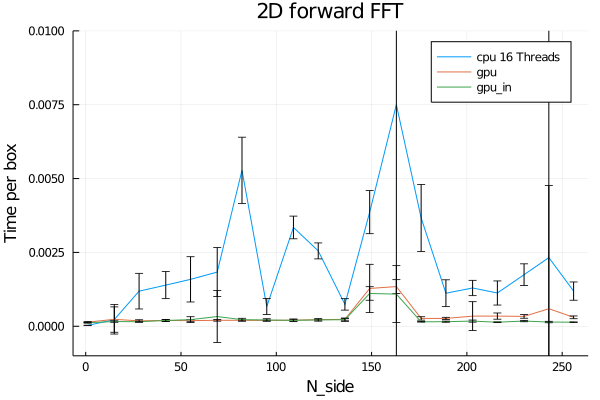

In [79]:
Plots.plot(Ns,Statistics.mean(t_run_cpu,dims=2),yerror=Statistics.std(t_run_cpu,dims=2),label="cpu "*string(N_threads)*" Threads")
Plots.plot!(Ns,Statistics.mean(t_run_gpu,dims=2),yerror=Statistics.std(t_run_gpu,dims=2),label="gpu")
Plots.plot!(Ns,Statistics.mean(t_run_gpu_in,dims=2),yerror=Statistics.std(t_run_gpu_in,dims=2),label="gpu_in")
Plots.plot!(ylabel="Time per box",xlabel="N_side",title="2D forward FFT")
Plots.plot!(ylim=(-0.001,0.01))

# 3D

In [44]:
Ns=Int64.(ceil.(LinRange(1,256,20)))
N_repeat=5
d=3

3

In [45]:
t_compile_cpu=Array{Float32}(undef,length(Ns))
t_run_cpu=Array{Float32}(undef,length(Ns),N_repeat)
for (ind,N) in enumerate(Ns)
    tc,tr=test_cpu(N_repeat=N_repeat,N=N,d=d);
    t_compile_cpu[ind]=tc
    t_run_cpu[ind,:]=tr
end

In [46]:
t_compile_gpu=Array{Float32}(undef,length(Ns))
t_run_gpu=Array{Float32}(undef,length(Ns),N_repeat)
for (ind,N) in enumerate(Ns)
    tc,tr=test_gpu(N_repeat=N_repeat,N=N,d=d);
    t_compile_gpu[ind]=tc
    t_run_gpu[ind,:]=tr
end

In [47]:
t_compile_gpu_in=Array{Float32}(undef,length(Ns))
t_run_gpu_in=Array{Float32}(undef,length(Ns),N_repeat)
for (ind,N) in enumerate(Ns)
    tc,tr=test_gpu_in(N_repeat=N_repeat,N=N,d=d);
    t_compile_gpu_in[ind]=tc
    t_run_gpu_in[ind,:]=tr
end

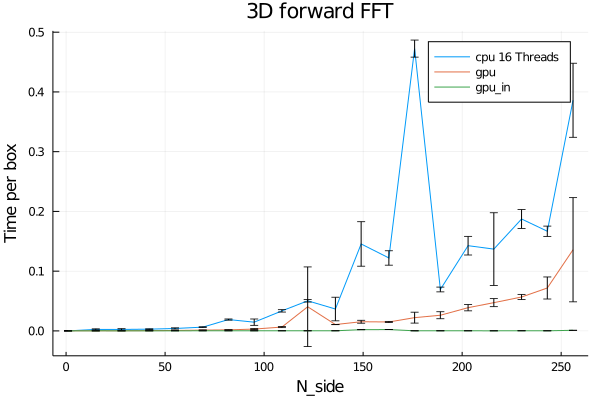

In [48]:
Plots.plot(Ns,Statistics.mean(t_run_cpu,dims=2),yerror=Statistics.std(t_run_cpu,dims=2),label="cpu "*string(N_threads)*" Threads")
Plots.plot!(Ns,Statistics.mean(t_run_gpu,dims=2),yerror=Statistics.std(t_run_gpu,dims=2),label="gpu")
Plots.plot!(Ns,Statistics.mean(t_run_gpu_in,dims=2),yerror=Statistics.std(t_run_gpu_in,dims=2),label="gpu_in")
Plots.plot!(ylabel="Time per box",xlabel="N_side",title="3D forward FFT")

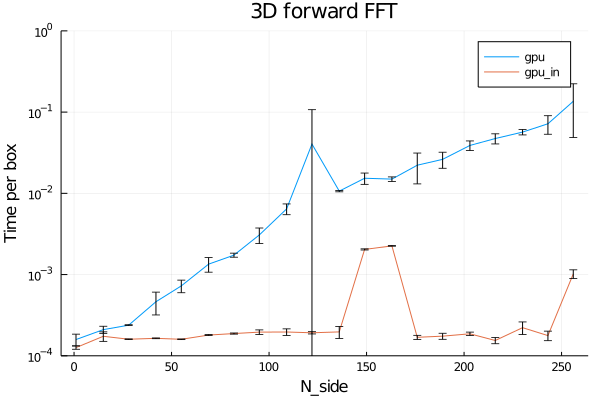

In [59]:
Plots.plot(Ns,Statistics.mean(t_run_gpu,dims=2),yerror=Statistics.std(t_run_gpu,dims=2),label="gpu", yaxis=:log)
Plots.plot!(Ns,Statistics.mean(t_run_gpu_in,dims=2),yerror=Statistics.std(t_run_gpu_in,dims=2),label="gpu_in")
Plots.plot!(ylabel="Time per box",xlabel="N_side",title="3D forward FFT")
Plots.plot!(ylim=(1e-4,1))

In [ ]:
CUDA.CUFFT.

In [66]:
A=rand(ComplexF64,256,256);
A_c=CUDA.CuArray(A);

In [70]:
A_c' *A_c

1.1185296472795162e7 - 6.635933338607536e-14im

In [ ]:
S2[f1,f2] = sum(abs2.(f_val .* thisim[f_mm[1,1]:f_mm[1,2],f_mm[2,1]:f_mm[2,2]]))/(Nx*Ny)

In [31]:
N=256
A=rand(Float32,N,N,N);
A_c=CUDA.CuArray(A);
N_threads=16
FFTW.set_num_threads(N_threads)
P=FFTW.plan_fft(A);
P_c=CUDA.CUFFT.plan_fft(A_c);

In [32]:
@time B_c=P_c*A_c;

  0.002285 seconds (78 allocations: 2.219 KiB)


In [40]:
@time bs_c=CUDA.CUFFT.fftshift(B_c);

  0.000079 seconds (134 allocations: 3.766 KiB)


In [56]:
N=256
A=rand(Float32,N,N,N);
A_c=CUDA.CuArray(A);
B_c=CUDA.CuArray(A);

In [59]:
@time C_c=A_c.*B_c

  0.000300 seconds (35 allocations: 1.250 KiB)


256×256×256 CUDA.CuArray{Float32, 3}:
[:, :, 1] =
 0.785984     0.00119747   0.766289    …  0.0715037   0.0407357   0.509658
 0.729895     0.994749     0.0347398      0.115601    0.571656    0.280563
 0.0120509    0.0497668    0.0911317      0.00534927  0.673156    0.0336404
 0.0761908    0.0225119    0.58551        0.0393858   0.597665    0.00227862
 0.637237     0.263177     0.246908       1.40515f-5  0.2169      0.0450184
 0.151864     0.0659853    0.954753    …  0.416436    0.0955183   0.133329
 0.0735721    0.01057      0.894669       0.147467    0.256288    0.717318
 0.329379     0.664284     0.0704363      0.0624585   0.179403    0.954722
 0.0017036    0.218416     0.21217        0.789788    0.401607    0.485925
 0.184825     0.414707     0.309112       0.908611    0.126113    0.40836
 0.231159     0.27304      0.0119199   …  0.14106     0.744386    0.0150428
 0.454094     0.000737532  0.885005       0.205307    0.150085    1.99414f-5
 0.00975954   0.710185     0.0558986      0.

In [66]:
@time P*A;

  4.034723 seconds (4 allocations: 2.000 GiB, 1.33% gc time)


In [ ]:
CUDA.CUFFT.plan_fft()

In [ ]:
CUDA.CUFFT.plan_fft()

In [ ]:
CUDA.CUFFT.plan_bfft()

In [3]:
N=256
A=rand(Float32,N,N,N);
A_c=CUDA.CuArray(A);
N_threads=16
FFTW.set_num_threads(N_threads)
#P=FFTW.plan_fft(A);
#P_c=CUDA.CUFFT.plan_fft(A_c);

In [35]:
@time P_c*A_c;

  0.001012 seconds (93 allocations: 6.344 KiB)


In [17]:
@time CUDA.CUFFT.fft(A_c);

  0.025744 seconds (93 allocations: 3.094 KiB)


In [18]:
A_cc=CUDA.CuArray(A);

In [21]:
@time J=CUDA.CUFFT.fft!(A_cc);

LoadError: MethodError: no method matching plan_fft!(::CUDA.CuArray{Float32, 3}, ::UnitRange{Int64})
[0mClosest candidates are:
[0m  plan_fft!([91m::CUDA.CuArray{T, N}[39m, ::Any) where {T<:Union{ComplexF32, ComplexF64}, N} at /home/cfpark/.julia/packages/CUDA/Zmd60/lib/cufft/fft.jl:251
[0m  plan_fft!([91m::StridedArray{T, N}[39m, ::Any; flags, timelimit) where {T<:Union{ComplexF32, ComplexF64}, N} at /home/cfpark/.julia/packages/FFTW/G3lSO/src/fft.jl:688
[0m  plan_fft!(::AbstractArray; kws...) at /home/cfpark/.julia/packages/AbstractFFTs/JAxy0/src/definitions.jl:52

In [29]:
@time P*A;

  0.423883 seconds (6 allocations: 256.000 MiB, 13.36% gc time)


In [20]:
CUDA.reclaim()

4160749568

In [13]:
A=ones(Float32,4,4)

4×4 Matrix{Float32}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

In [14]:
A./2

4×4 Matrix{Float32}:
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5